# Raízes de Funções
## Andre Nepomuceno - UFF

**1. Encontrando raízes de funções**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import brentq, newton, fsolve

Exemplo 1:
\begin{equation}
    f(x) \, = \, \frac{1}{5} + x \textrm{cos} \left ( \frac{3}{x} \right ).
    \nonumber
\end{equation}

In [2]:
f1 = lambda x: 0.2 + x*np.cos(3/x)

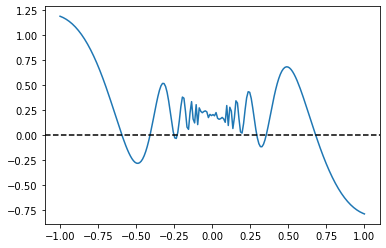

In [3]:
x = np.linspace(-1,1,200)
plt.plot(x,f1(x))
plt.axhline(0, c='k',ls='--')

In [4]:
#intervalo [-0.7,-0.5]
print(np.sign(f1(-0.7)))
print(np.sign(f1(-0.5)))

1.0
-1.0


In [5]:
#calcule as raizes
brentq(f1,-0.7,-0.5)

-0.5933306271014237

Exemplo 2:
\begin{equation}
    f(x) \, = \, e^x - 2
    \nonumber
\end{equation}

In [6]:
f2 = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x)
x0 = 2
xsol = newton(f2,x0,fprime=fprime)
print(xsol)

0.6931471805599453


In [7]:
#verifique a solução
np.isclose(f2(xsol),0,atol=1e-10)

True

**2. Raízes de Polinômio**

Exemplo:
    \begin{equation}
    f(x) = x^4 + x + 1
    \end{equation}

In [8]:
#Vamos passar os coenficientes do polinômio
coef = [1,0,0,1,1]
np.roots(coef)

array([ 0.72713608+0.93409929j,  0.72713608-0.93409929j,
       -0.72713608+0.43001429j, -0.72713608-0.43001429j])

**3. Sistemas de Eq. não Lineares**

Exemplo: 
    \begin{align*}
    y - x^3 - 2x^2 +1 &= \,0 ,\\
    y + x^2 -1   &= \, 0
\end{align*}

In [9]:
def f(x):
    return [ x[1] - x[0]**3 - 2*x[0]**2 +1, x[1]+x[0]**2 - 1 ]

In [10]:
xsol = fsolve(f,[1,1])
print(xsol)

[0.73205081 0.46410162]


In [11]:
np.isclose(f(xsol),[0,0])

array([ True,  True])

In [12]:
#jacobiano
def f_jacobian(x):
    return [[-3*x[0]**2 - 4*x[0], 1], [2*x[0], 1]]

In [13]:
x1 = fsolve(f,[1,1], fprime=f_jacobian)
x2 = fsolve(f,[-2,-5], fprime=f_jacobian)
print(x1)
print(x2)

[0.73205081 0.46410162]
[-2.73205081 -6.46410162]


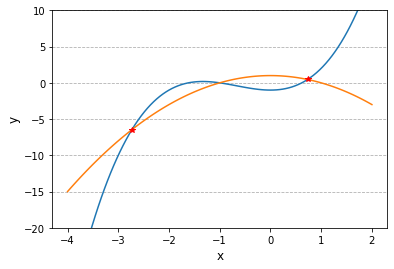

In [24]:
x = np.linspace(-4,2,100)
plt.plot(x,x**3+2*x**2-1)
plt.plot(x,-x**2+1)
plt.plot(x1[0],x1[1],'r*')
plt.plot(x2[0],x2[1],'r*')
plt.ylim(-20,10)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.grid(axis='y',ls='--')